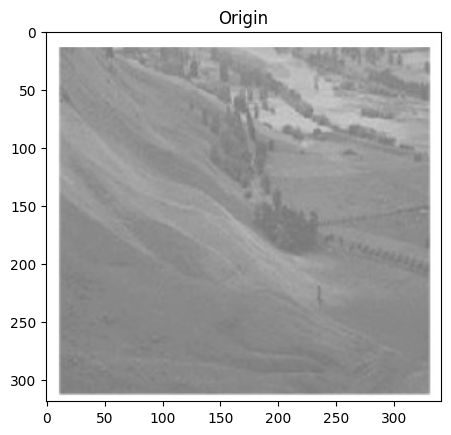

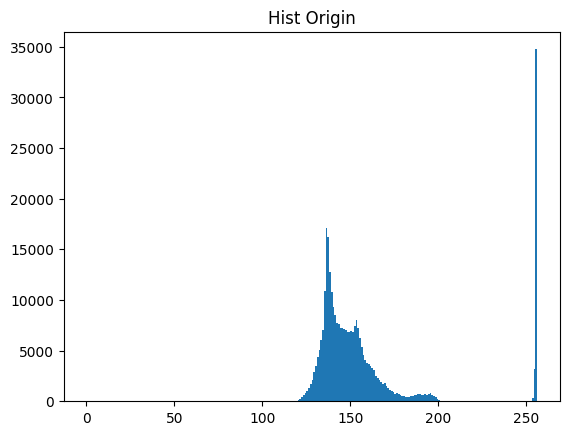

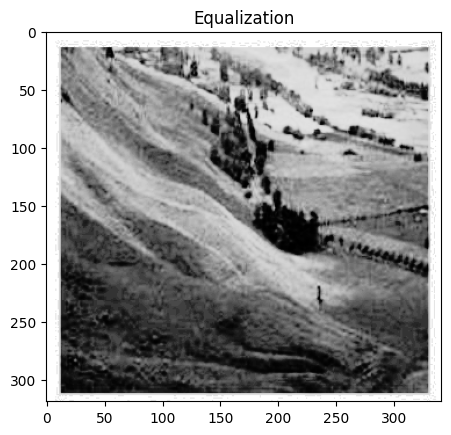

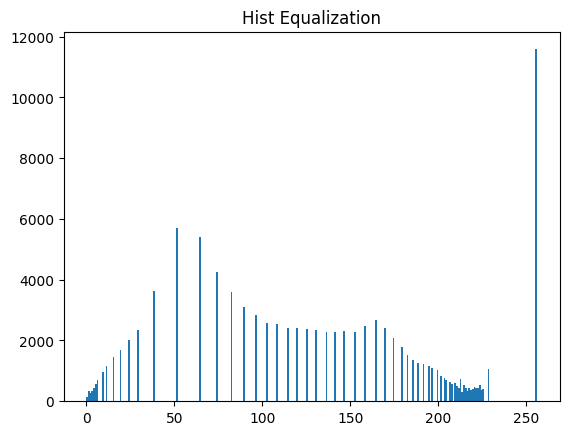

(Text(0.5, 1.0, 'Median'),
 <Figure size 640x480 with 0 Axes>)

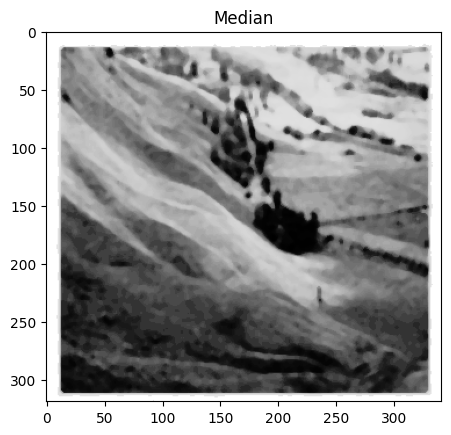

<Figure size 640x480 with 0 Axes>

In [51]:
#no 1
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('img/KB1/gambar 1.jpg')
gRGB = cv.cvtColor(img, cv.COLOR_BGR2RGB)
gray = cv.cvtColor(gRGB, cv.COLOR_RGB2GRAY)
hieq = cv.equalizeHist(gray)
median = cv.medianBlur(hieq, 5)

plt.title("Origin"), plt.imshow(gRGB), plt.figure()
plt.title("Hist Origin"), plt.hist(gRGB.ravel(), 256, [0, 256]); plt.show(), plt.figure()
plt.title("Equalization"), plt.imshow(hieq, cmap='gray'), plt.figure()
plt.title("Hist Equalization"), plt.hist(hieq.ravel(), 256, [0, 256]); plt.show()
plt.title("Median"), plt.imshow(median, cmap='gray'), plt.figure()

(Text(0.5, 1.0, 'Median'),
 <Figure size 640x480 with 0 Axes>)

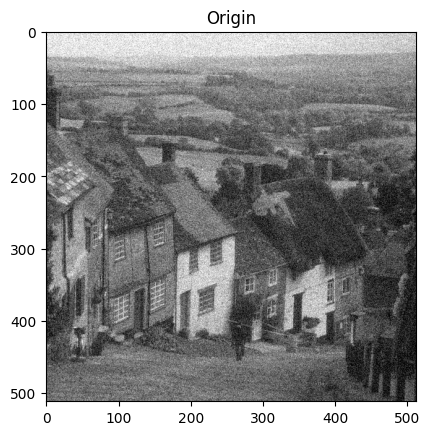

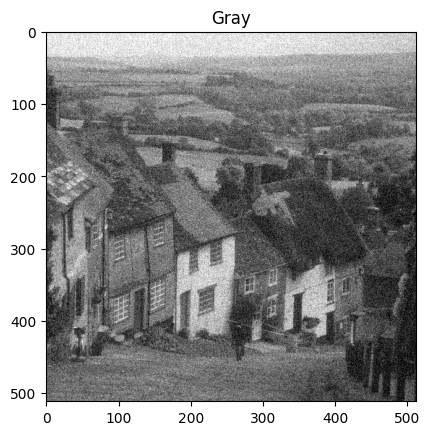

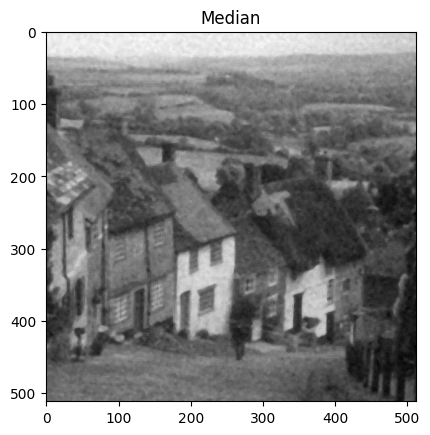

<Figure size 640x480 with 0 Axes>

In [54]:
#no 2
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('img/KB1/gambar 2.jpg')
gRGB = cv.cvtColor(img, cv.COLOR_BGR2RGB)
gray = cv.cvtColor(gRGB, cv.COLOR_RGB2GRAY)
median = cv.medianBlur(gray,5)

plt.title("Origin"), plt.imshow(gRGB, cmap='gray'), plt.figure()
plt.title("Gray"), plt.imshow(gray, cmap='gray'), plt.figure()
plt.title("Median"), plt.imshow(median, cmap='gray'), plt.figure()

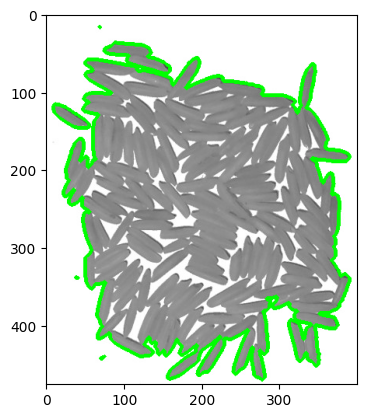

In [47]:
import cv2 as cv
import imutils
import matplotlib.pyplot as plt

# load the input image via opencv's imread
image = cv.imread("img/KB1/gambar 3.jpg")
plt.imshow(image)


# convert  the image to a grayscale type.
gray_scaled = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
plt.imshow( gray_scaled)


#Applying Edge detection to find outlines of objects.
edged = cv.Canny(gray_scaled, 30,150)
plt.imshow(edged)


#Thresholding the image.
# i set all pixels greater than 225 to 225
# i also set pixels less than 225 to 225
thresh = cv.threshold(gray_scaled, 225,225, cv.THRESH_BINARY_INV)[1]
plt.imshow(thresh)


#detecting and drawing contours.
# first we find the contours in the thresholded image.
contours = cv.findContours(thresh.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)

output = image.copy()
for contour in contours:# loop over each contour found
    cv.drawContours(output, [contour], -1,(0,255,0),3) # outline and display them, one by one.
    plt.imshow(output)
    
    
# # count the number of objects found in the image
# # write count as text too.
# text = "There are {} objects here.".format(len(contours))
# cv.putText(output, text, (10,25), cv.FONT_HERSHEY_SIMPLEX, 0.7,(240, 0, 159), 2)
# plt.imshow(output)


# # reduce noise futher in image using erosion.
# mask = thresh.copy()
# mask = cv.erode(mask, None, iterations =5)
# plt.imshow(mask, cmap='gray')

# # cv.imwrite("output10.jpg", mask)

# # reduce noise futher using Dilation.
# mask = thresh.copy()
# mask = cv.dilate(mask, None, iterations = 5)
# plt.imshow(mask)


# #Masking and Bitwise operations.
# mask = thresh.copy()
# output = cv.bitwise_and(image, image, mask = mask)
# plt.imshow(output)

# cv.imwrite("output12.jpg", output)


rice in the image :  154


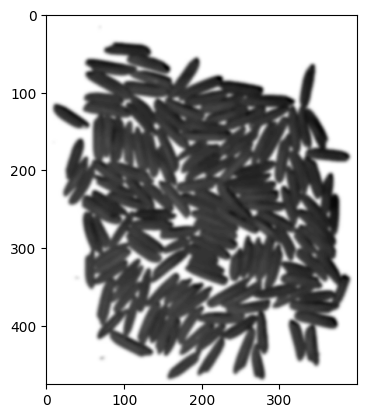

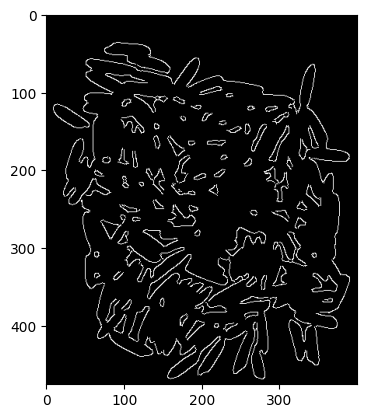

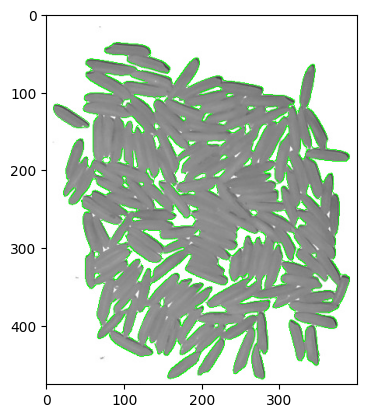

In [46]:
#no 3 google
import cv2 as cv
import numpy as np 
import matplotlib.pyplot as plt 

image = cv.imread('img/KB1/gambar 3.jpg') 
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY) 

blur = cv.GaussianBlur(gray, (11, 11), 0) 
plt.imshow(blur, cmap='gray')
plt.figure()
canny = cv.Canny(blur, 43, 140, 3) 
plt.imshow(canny, cmap='gray')
plt.figure()

(cnt, hierarchy) = cv.findContours( 
	canny.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE) 
rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB) 
output =  cv.drawContours(rgb, cnt, -1, (0, 255, 0), 1) 
plt.imshow(output, cmap='gray')


print("rice in the image : ", len(cnt)) 


objects number is: 114


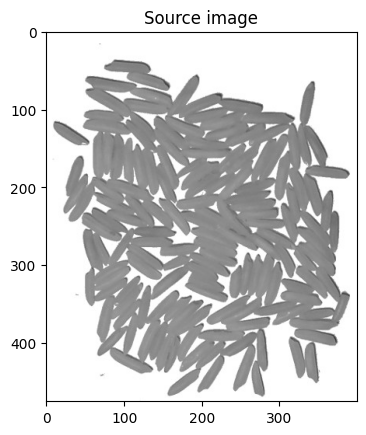

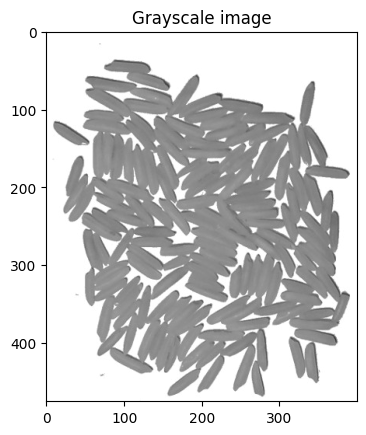

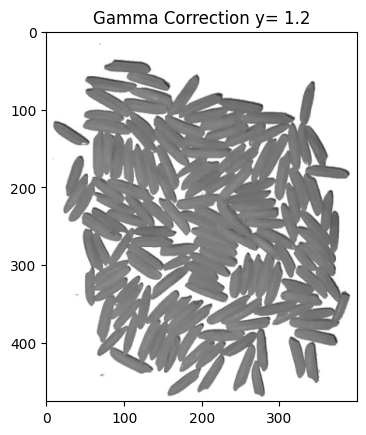

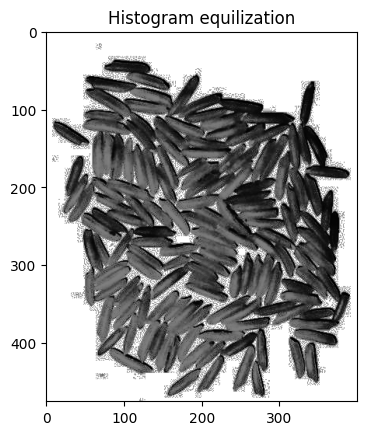

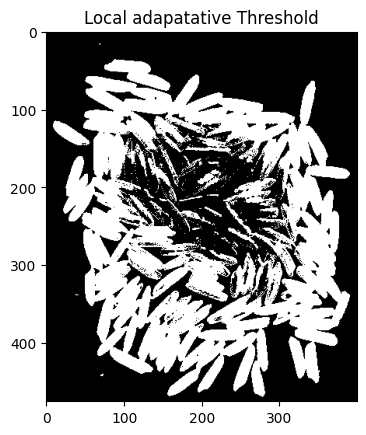

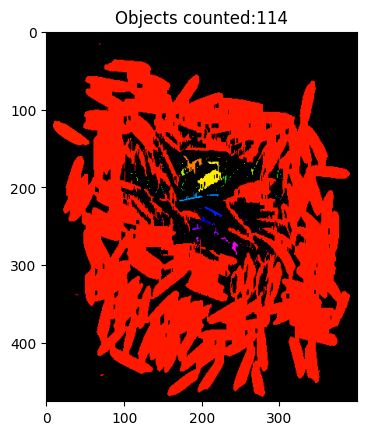

<Figure size 640x480 with 0 Axes>

In [56]:
#no 3
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# Convert image in grayscale
img = cv.imread('img/KB1/gambar 3.jpg')
plt.title('Source image')
plt.imshow(img, cmap="gray", vmin=0, vmax=255)
plt.figure()

gray_im = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.title('Grayscale image')
plt.imshow(gray_im, cmap="gray", vmin=0, vmax=255)
plt.figure()

# Contrast adjusting with gamma correction y = 1.2
gray_correct = np.array(255 * (gray_im / 255) ** 1.2 , dtype='uint8')
plt.title('Gamma Correction y= 1.2')
plt.imshow(gray_correct, cmap="gray", vmin=0, vmax=255)
plt.figure()

# Contrast adjusting with histogramm equalization
gray_equ = cv.equalizeHist(gray_im)
plt.title('Histogram equilization')
plt.imshow(gray_equ, cmap="gray", vmin=0, vmax=255)
plt.figure()

# Local adaptative threshold
thresh = cv.adaptiveThreshold(gray_correct, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 255, 19)
thresh = cv.bitwise_not(thresh)
plt.title('Local adapatative Threshold')
plt.imshow(thresh, cmap="gray", vmin=0, vmax=255)
plt.figure()

# Dilatation et erosion
kernel = np.ones((5,1), np.uint8)
img_dilation = cv.dilate(thresh, kernel, iterations=1)
img_erode = cv.erode(img_dilation,kernel, iterations=1)

# Labeling
ret, labels = cv.connectedComponents(img_erode)
label_hue = np.uint8(179 * labels / np.max(labels))
blank_ch = 255 * np.ones_like(label_hue)
labeled_img = cv.merge([label_hue, blank_ch, blank_ch])
labeled_img = cv.cvtColor(labeled_img, cv.COLOR_HSV2BGR)
labeled_img[label_hue == 0] = 0

plt.title('Objects counted:'+ str(ret-1))
plt.imshow(labeled_img) 
plt.figure()
print('objects number is:', ret-1)
plt.show()

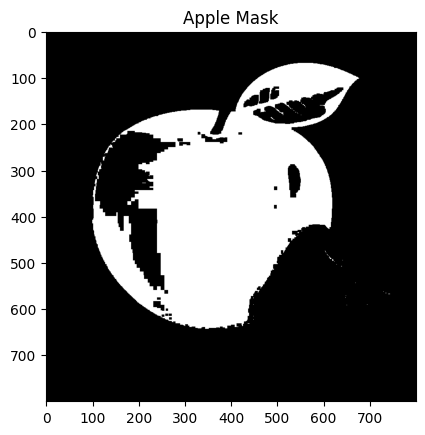

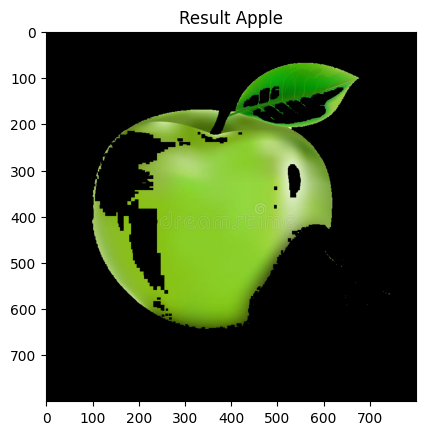

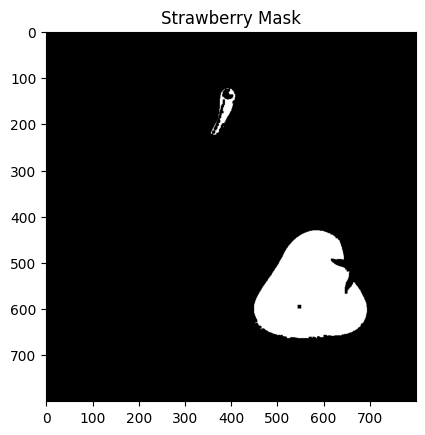

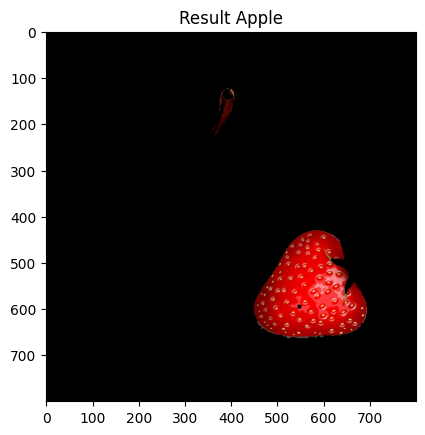

In [84]:
#no 4
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar
gambar = cv2.imread('img/KB1/gambar 4.jpg')

# Mengubah warna gambar dari BGR ke HSV
gambar_hsv = cv2.cvtColor(gambar, cv2.COLOR_BGR2HSV)

# Mendefinisikan rentang warna
lower_green = np.array([40, 50, 50]) 
upper_green = np.array([60, 255, 255]) 
lower_red = np.array([0, 50, 50])
upper_red = np.array([10, 255, 255])

# Membuat mask
mask_apple = cv2.inRange(gambar_hsv, lower_green, upper_green)
mask_strawberry = cv2.inRange(gambar_hsv, lower_red, upper_red)

# Operasi morfologi untuk memperbaiki mask
kernel = np.ones((5, 5), np.uint8)
mask_apple = cv2.morphologyEx(mask_apple, cv2.MORPH_CLOSE, kernel)
mask_strawberry = cv2.morphologyEx(mask_strawberry, cv2.MORPH_CLOSE, kernel)
# Menyaring hasil dengan operasi bitwise
result_apple = cv2.bitwise_and(gambar, gambar, mask=mask_apple)
result_strawberry = cv2.bitwise_and(gambar, gambar, mask=mask_strawberry)

# Menampilkan hasil
plt.imshow(cv2.cvtColor(mask_apple, cv2.COLOR_GRAY2RGB)), plt.title('Apple Mask'), plt.figure()
plt.imshow(cv2.cvtColor(result_apple, cv2.COLOR_BGR2RGB)), plt.title('Result Apple'), plt.figure()
plt.imshow(cv2.cvtColor(mask_strawberry, cv2.COLOR_GRAY2RGB)), plt.title('Strawberry Mask'), plt.figure()
plt.imshow(cv2.cvtColor(result_strawberry, cv2.COLOR_BGR2RGB)), plt.title('Result Apple')
plt.show()
